# Primeiro relatório de processamento digital de imagens

### Experimento 1 - Equalização de Histograma em Tons de Cinza

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests


<>:67: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:68: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:69: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:67: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:68: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:69: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
C:\Users\Dell G15\AppData\Local\Temp\ipykernel_18260\862868142.py:67: Syntax


Processando: Paisagem


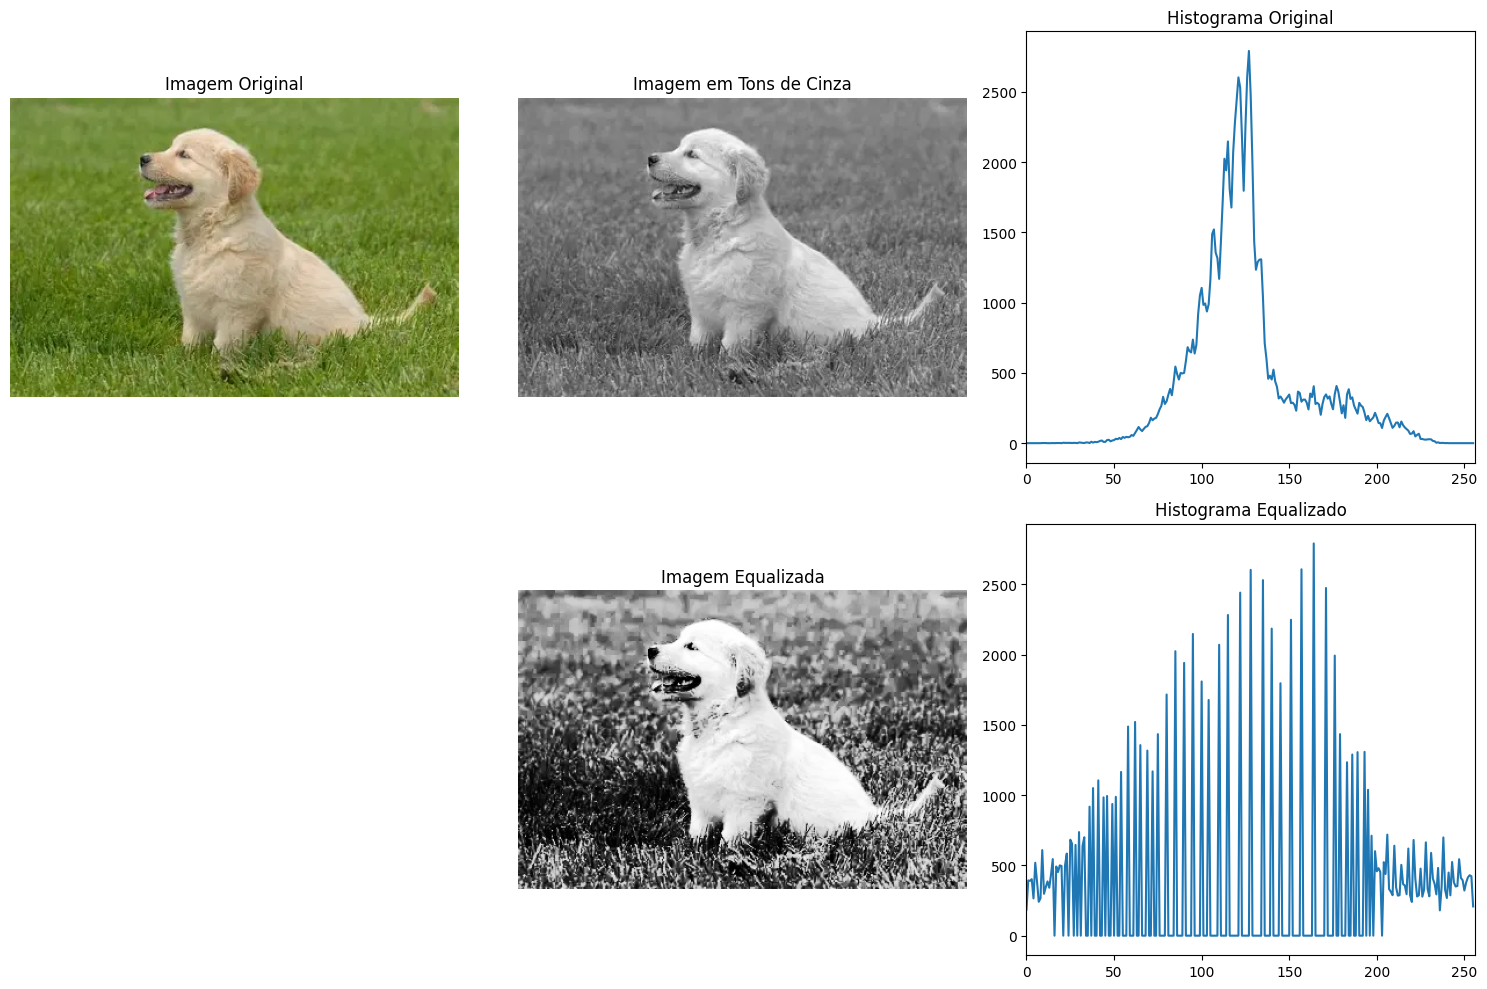


Processando: Retrato


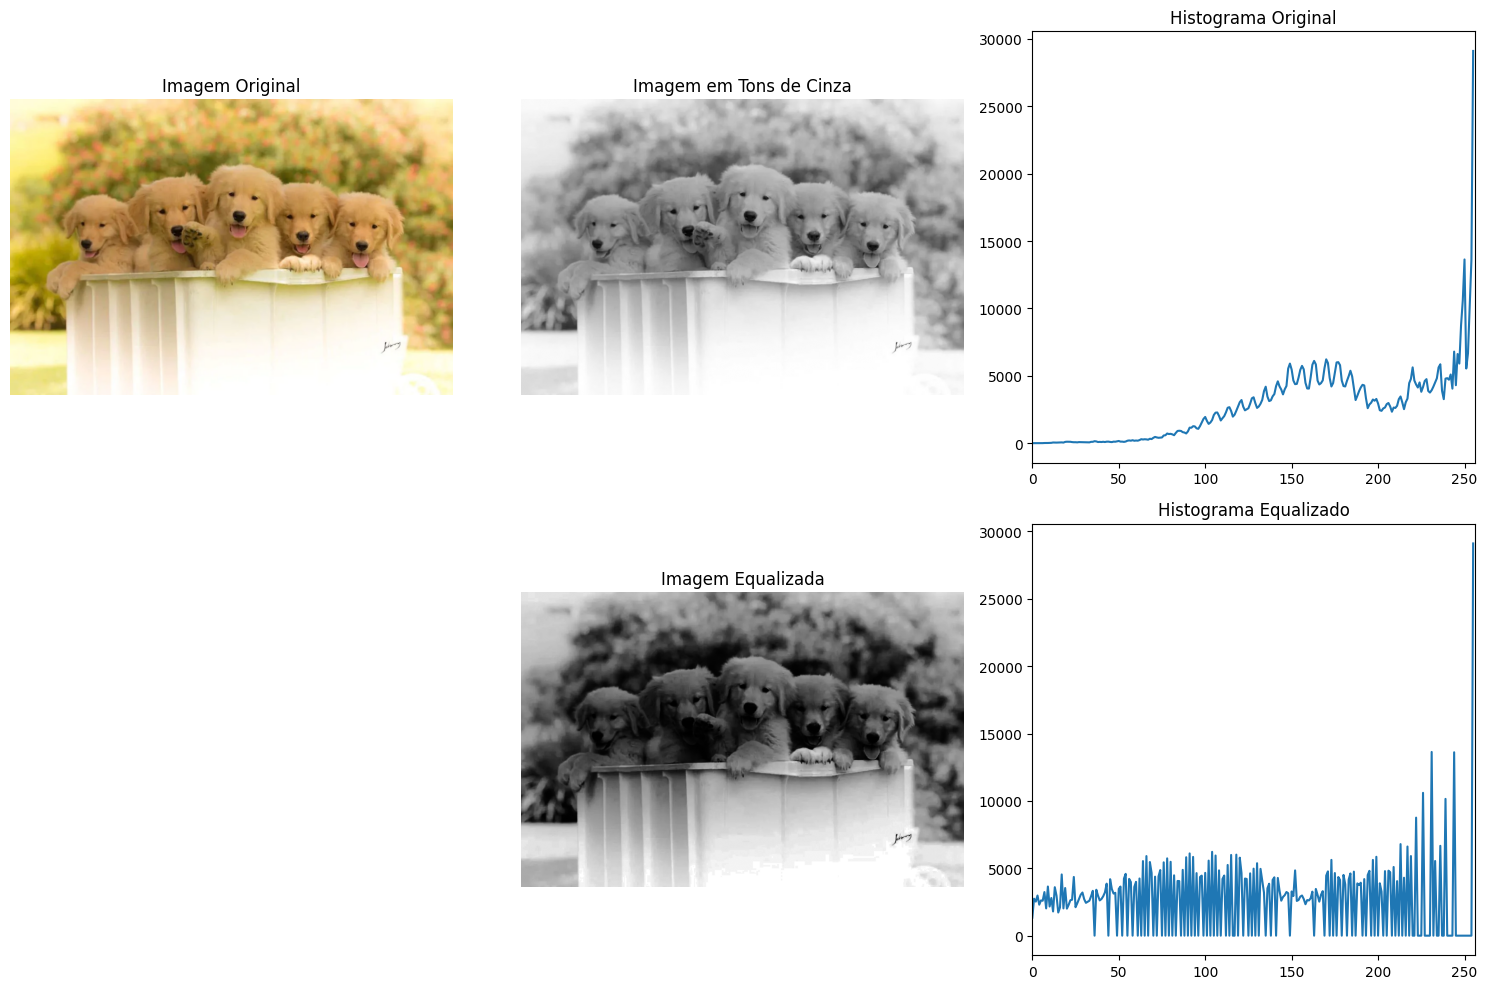


Processando: Objeto


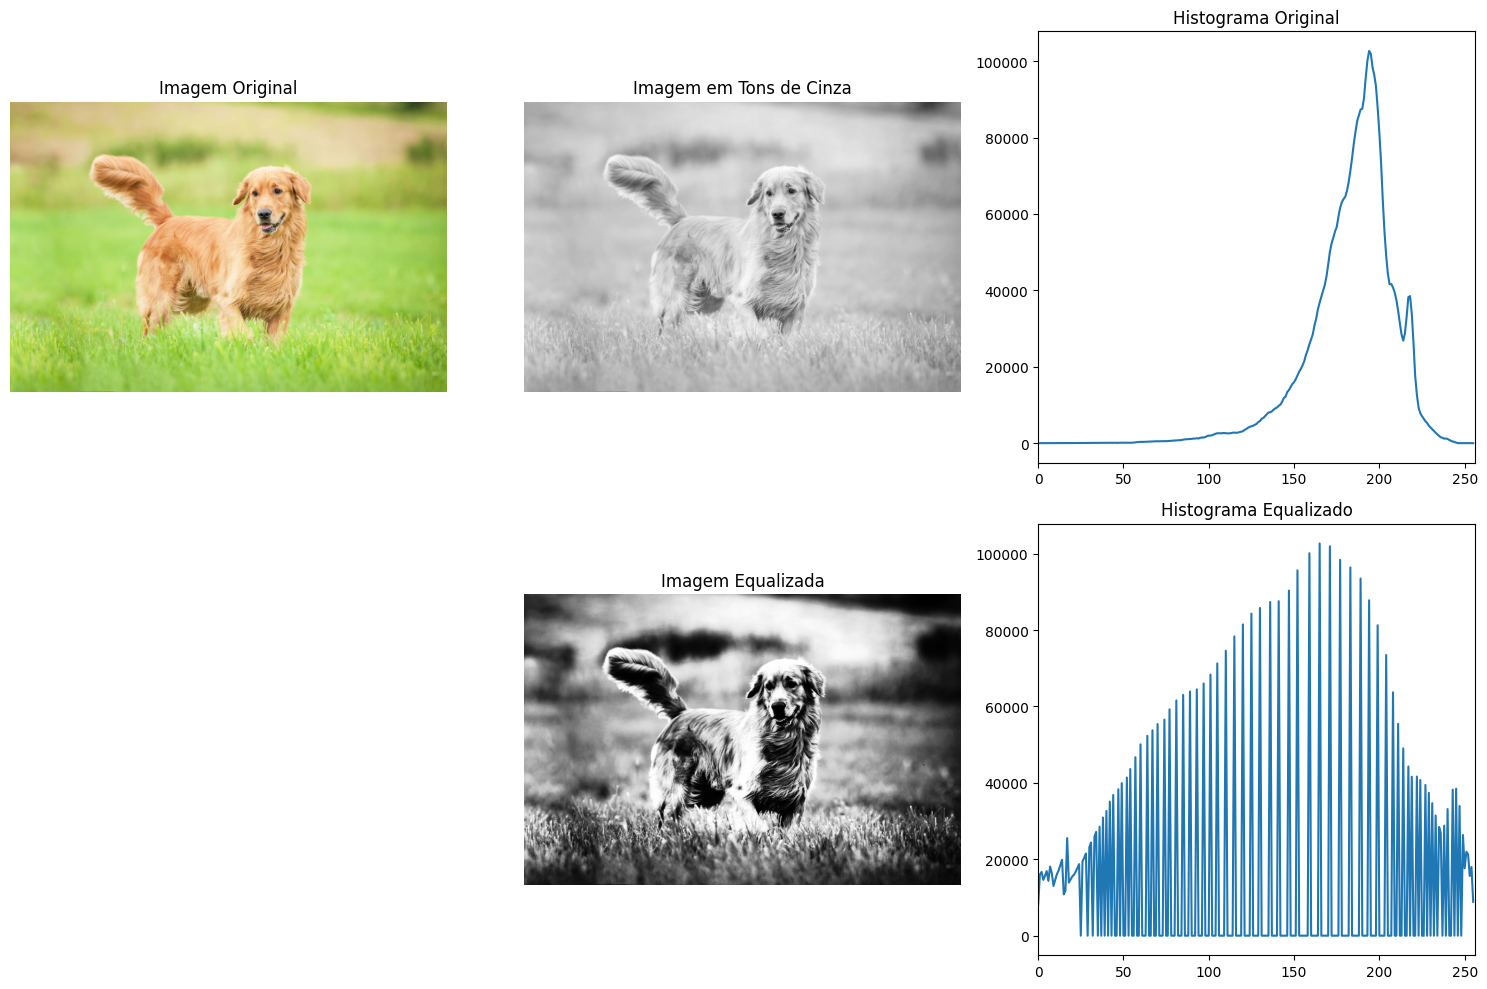

In [5]:
def processar_imagem_cinza(url, titulo):
    print(f"\n========================")
    print(f"Processando: {titulo}")
    print(f"========================")

    
    imagem_colorida  = cv2.imread(url, cv2.IMREAD_COLOR)

    # Converter BGR → RGB para exibir corretamente no matplotlib
    imagem_rgb = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2RGB)

    # vamos converter agora essa imagem para tons de cinza 
    imagem_cinza = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2GRAY)

    # 3vamos Calcular histograma antes da equalização
    hist_original = cv2.calcHist([imagem_cinza], [0], None, [256], [0, 256])

    # vamos Equalização de histograma
    imagem_equalizada = cv2.equalizeHist(imagem_cinza)

    # vamos Calcular histograma após equalização
    hist_equalizado = cv2.calcHist([imagem_equalizada], [0], None, [256], [0, 256])

    # ======================================================
    # VISUALIZAÇÃO
    # ======================================================
    plt.figure(figsize=(15, 10))

    # Imagem Original
    plt.subplot(2, 3, 1)
    plt.imshow(imagem_rgb)
    plt.title("Imagem Original")
    plt.axis("off")

    # Imagem em Cinza
    plt.subplot(2, 3, 2)
    plt.imshow(imagem_cinza, cmap="gray")
    plt.title("Imagem em Tons de Cinza")
    plt.axis("off")

    # Histograma Original
    plt.subplot(2, 3, 3)
    plt.plot(hist_original)
    plt.title("Histograma Original")
    plt.xlim([0, 256])

    # Imagem Equalizada
    plt.subplot(2, 3, 5)
    plt.imshow(imagem_equalizada, cmap="gray")
    plt.title("Imagem Equalizada")
    plt.axis("off")

    # Histograma Equalizado
    plt.subplot(2, 3, 6)
    plt.plot(hist_equalizado)
    plt.title("Histograma Equalizado")
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


# ==========================================================
# TRÊS EXEMPLOS DIFERENTES
# ==========================================================

imagem1 = "imagens\lab1_1.webp"
imagem2 = "imagens\lab1_2.webp"
imagem3 = "imagens\lab1_3.jpeg"

processar_imagem_cinza(imagem1, "imagem 1")
processar_imagem_cinza(imagem2, "imagem 2 ")
processar_imagem_cinza(imagem3, "imagem 3 ")

### Experimento 2 - Equalização RGB Separado 

<>:62: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:63: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:64: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:62: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:63: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:64: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
C:\Users\Dell G15\AppData\Local\Temp\ipykernel_18260\1172714383.py:62: Synta


Processando: imagem 1 


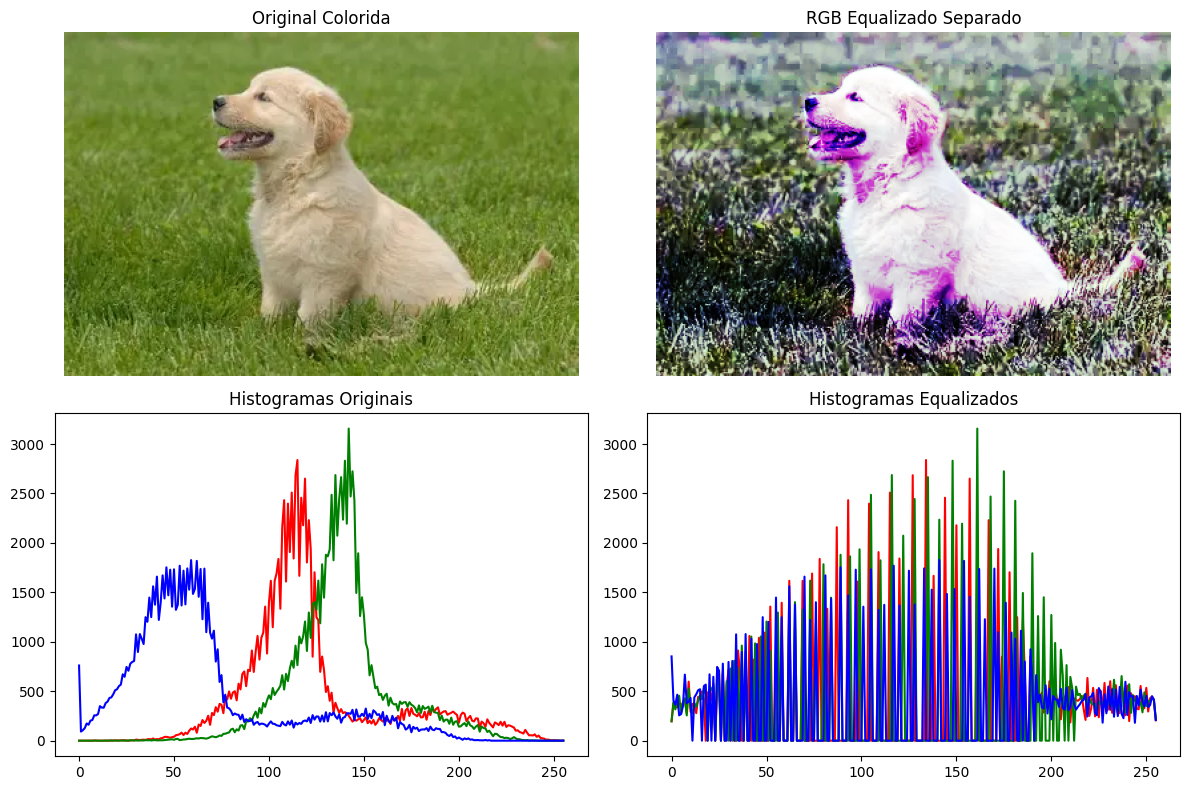


Processando: imagem 2


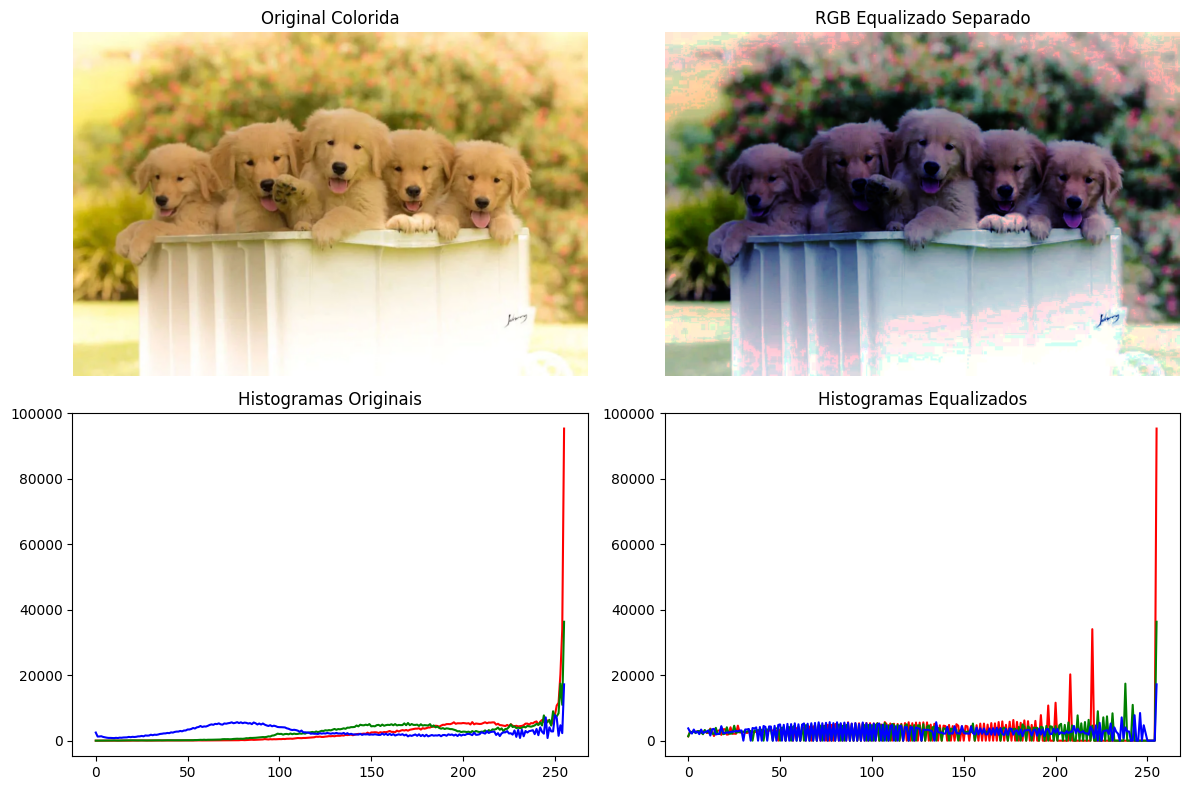


Processando: imagem 3 


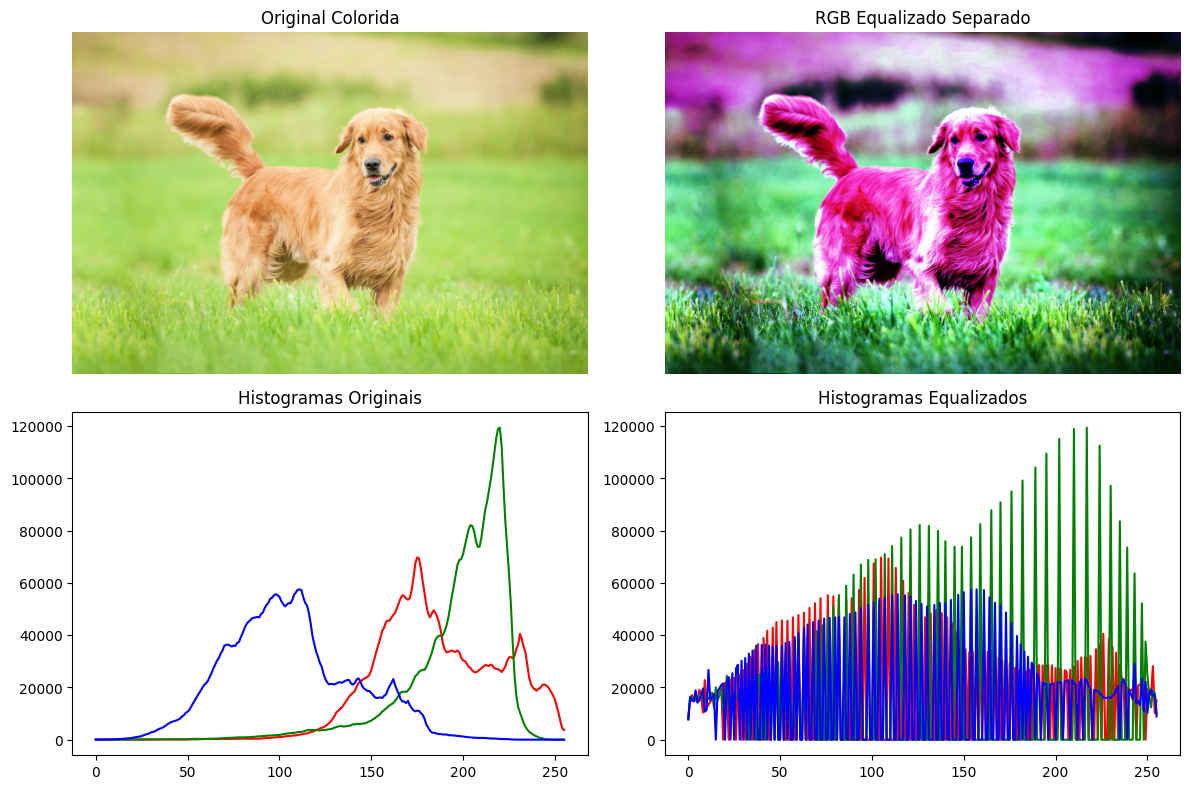

In [6]:

def processamento_colorido (URL, titulo):
 
    print(f"\n========================")
    print(f"Processando: {titulo}")
    print(f"========================")

    
    imagem_colorida  = cv2.imread(URL, cv2.IMREAD_COLOR)

    # Converter BGR → RGB para exibir corretamente no matplotlib
    imagem_rgb = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2RGB)

    r, g, b = cv2.split(imagem_rgb)

    # Histogramas originais
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

    # Equalizar cada canal
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)

    # Juntar novamente
    imagem_rgb_equalizada = cv2.merge([r_eq, g_eq, b_eq])

    # Histogramas equalizados
    hist_r_eq = cv2.calcHist([r_eq], [0], None, [256], [0, 256])
    hist_g_eq = cv2.calcHist([g_eq], [0], None, [256], [0, 256])
    hist_b_eq = cv2.calcHist([b_eq], [0], None, [256], [0, 256])

    # Visualização
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(imagem_rgb)
    plt.title("Original Colorida")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(imagem_rgb_equalizada)
    plt.title("RGB Equalizado Separado")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.plot(hist_r, color='r')
    plt.plot(hist_g, color='g')
    plt.plot(hist_b, color='b')
    plt.title("Histogramas Originais")

    plt.subplot(2, 2, 4)
    plt.plot(hist_r_eq, color='r')
    plt.plot(hist_g_eq, color='g')
    plt.plot(hist_b_eq, color='b')
    plt.title("Histogramas Equalizados")

    plt.tight_layout()
    plt.show()


imagem1 = "imagens\lab1_1.webp"
imagem2 = "imagens\lab1_2.webp"
imagem3 = "imagens\lab1_3.jpeg"

processamento_colorido(imagem1, "imagem 1 ")
processamento_colorido(imagem2, "imagem 2")
processamento_colorido(imagem3, "imagem 3 ")